## Code to reproduce Figure S3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import os
import pickle
import cftime
import matplotlib.dates as mdates


In [2]:
# Read data

os.chdir('/gws/nopw/j04/vplume/mchim/netcdf_files/NOx_monthly')

volc_scenario = ['novolc','volc25','volc50_1','volc50_2','volc98','const']

file_string = '_strat_N2O5.nc'
df_n2o5 = {}
for scenario in volc_scenario:
    file_name = scenario + file_string
    dataset = xr.open_dataset(file_name)
    df_n2o5[scenario] = dataset['strat_N2O5'][:]

In [3]:
def calc_global_mean(df):

    # select 60S to 90S
    df = df[:,:,0:24,:]
    
    weights = np.cos(np.deg2rad(df.latitude))
    weights.name = "weights"
    df_w = df.weighted(weights)

    # Global mean
    temp_globalmean = df_w.mean(dim=['latitude','longitude'])

    # Global annual mean
    temp_global_annual = temp_globalmean.groupby('time.year').mean('time')
    
    return temp_global_annual

def calc_conc(species, mv):

    # total mass in the stratosphere
    df = calc_global_mean(species)

    conc = (df*28.97/mv) *1e9 #convert to ppb

    ens_mean = conc.mean(dim='ensemble')
    ens_min = conc.min(dim='ensemble')
    ens_max = conc.max(dim='ensemble')

    return ens_mean#, ens_min, ens_max

def calc_max_min(species):

    # total mass in the stratosphere
    df_cl = calc_global_mean(species)

    conc = (df*28.97/mv) *1e9 #convert to ppb

    ens_mean = conc.mean(dim='ensemble')
    ens_min = conc.min(dim='ensemble')
    ens_max = conc.max(dim='ensemble')
    
    return ens_min, ens_max

In [4]:
n2o5_novolc = calc_conc(df_n2o5['novolc'], 108.01)
n2o5_volc50_1 =calc_conc(df_n2o5['volc50_1'], 108.01)
n2o5_volc50_2 =calc_conc(df_n2o5['volc50_2'], 108.01)
n2o5_volc25 = calc_conc(df_n2o5['volc25'], 108.01)
n2o5_volc98 = calc_conc(df_n2o5['volc98'], 108.01)
n2o5_const = calc_conc(df_n2o5['const'], 108.01)

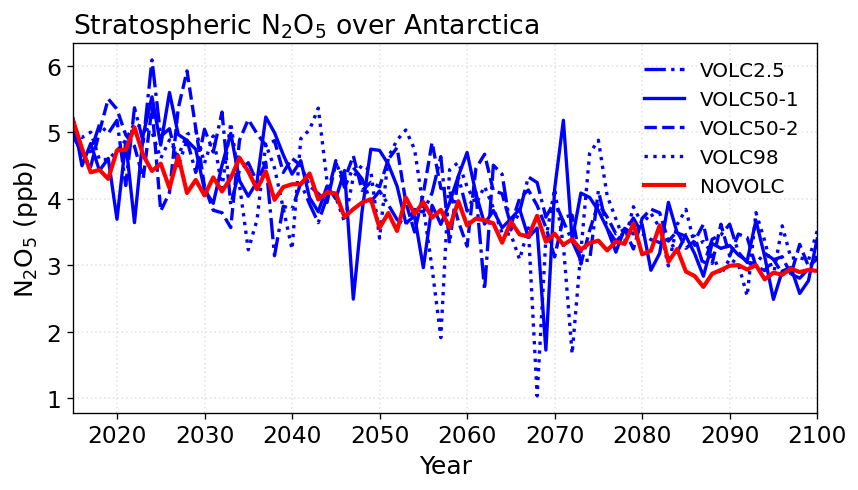

In [6]:
fig, ax = plt.subplots(figsize=(8,4),dpi=120)

year_axis = np.arange(2015,2101,1)

ax.plot(year_axis, n2o5_volc25, color = 'blue', ls = 'dashdot', label = 'VOLC2.5', linewidth = 2)
ax.plot(year_axis, n2o5_volc50_1, color = 'blue', ls = 'solid', label = 'VOLC50-1', linewidth = 2)
ax.plot(year_axis, n2o5_volc50_2, color = 'blue', ls = 'dashed', label = 'VOLC50-2', linewidth = 2)
ax.plot(year_axis, n2o5_volc98, color = 'blue', ls = 'dotted', label = 'VOLC98', linewidth = 2)

lighlbl = '#C7E9FF'

ax.plot(year_axis, n2o5_novolc, color = 'red', label = 'NOVOLC', linewidth = 2.5)

ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.set_ylabel('N$_2$O$_5$ (ppb)', fontsize=15)
ax.set_title('Stratospheric N$_2$O$_5$ over Antarctica', loc='left',fontsize=16)
ax.set_xlabel('Year',fontsize=15)
#ax.set_ylim(255,320)
ax.set_xlim(2015,2100)
ax.grid(color='grey', which = 'both', linestyle='dotted', linewidth=1, alpha = 0.2)
ax.legend(fontsize = 12, loc = 'upper right', ncol = 1, frameon=False)
